In [103]:
import pandas as pd 
import numpy as np
import seaborn as sns
import re
import sqlite3

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='D:/Downloads/Microsoft_JH_6.12/msjh.ttc')

import networkx as nx

import os 
os.chdir('D:/Google雲端硬碟/Project/Side_Project_Taipei_MRT_OD_Traffic/Datasets')

In [2]:
conn = sqlite3.connect('MRT.db')
cur = conn.cursor()

In [3]:
cur.execute('''SELECT * FROM MRT_OD_Traffic LIMIT 2;''').fetchall()

[('2017-01-01', 0, '松山機場', '松山機場', 0), ('2017-01-01', 0, '松山機場', '中山國中', 0)]

In [4]:
cur.execute('''SELECT COUNT(*) FROM MRT_OD_Traffic;''').fetchall()

[(89439552,)]

In [5]:
cur.execute('''SELECT MIN(Date) FROM MRT_OD_Traffic;''').fetchall()

[('2017-01-01',)]

In [6]:
cur.execute('''SELECT MAX(Date) FROM MRT_OD_Traffic;''').fetchall()

[('2018-01-01',)]

In [43]:
conn.close()

In [35]:
df_tmp = cur.execute('''SELECT * FROM MRT_OD_Traffic WHERE Date >= Datetime('2017-01-01')-1 AND Date <= Datetime('2017-01-31');''').fetchall()

In [36]:
df_tmp = pd.DataFrame(df_tmp)

In [37]:
df_tmp.columns = ['Date', 'Time', 'Origin', 'Destination', 'Traffic']

In [41]:
df_tmp.groupby(['Origin', 'Destination'])['Traffic'].agg(sum).reset_index()

,Origin,Destination,Traffic
0,七張,七張,3257
1,七張,三和國中,1939
2,七張,三民高中,1766
3,七張,三重,646
4,七張,三重國小,2030
5,七張,中山,13620
6,七張,中山國中,1375
7,七張,中山國小,3080
8,七張,中正紀念堂,14298
9,七張,丹鳳,1148


### Example

In [2]:
conn = sqlite3.connect('MRT.db')
cur = conn.cursor()

In [3]:
df_OD = cur.execute('''SELECT * FROM MRT_OD_Traffic WHERE Date >= Datetime('2017-01-01')-1 AND Date <= Datetime('2017-01-31');''').fetchall()

In [4]:
df_OD = pd.DataFrame(df_OD)

In [5]:
df_OD.columns = ['Date', 'Time', 'Origin', 'Destination', 'Traffic']

In [77]:
df_OD_per_station = df_OD.groupby(['Origin', 'Destination'])['Traffic'].agg(sum).reset_index()

In [78]:
#df_OD_per_station = df_OD_per_station.ix[df_OD_per_station['Origin'] != df_OD_per_station['Destination'], ]

In [79]:
conn.close()

In [82]:
df_OD_per_station_heatmap = df_OD.groupby(['Origin', 'Destination'])['Traffic'].agg(sum).unstack()

In [84]:
df_OD_per_station_heatmap

Destination,七張,三和國中,三民高中,三重,三重國小,中山,中山國中,中山國小,中正紀念堂,丹鳳,...,輔大,辛亥,迴龍,關渡,雙連,頂埔,頂溪,頭前庄,麟光,龍山寺
Origin,,,,,,,,,,,,,,,,,,,,,
七張,3257,1939,1766,646,2030,13620,1375,3080,14298,1148,...,1820,15,1264,1934,5973,749,6437,577,217,6993
三和國中,2076,2210,4485,748,4591,8179,443,9652,3664,2248,...,2862,133,2009,1267,5510,397,5393,1540,249,2066
三民高中,1815,3942,2229,895,5654,8882,438,9413,3541,1691,...,2649,113,1991,872,6761,524,4870,1284,310,2887
三重,583,741,877,1068,654,2111,154,3591,1073,3300,...,3977,51,3852,527,1972,102,1915,1934,110,388
三重國小,2001,4434,6236,609,1979,7635,413,7838,3856,1714,...,2495,149,1824,1746,4000,387,4904,1303,227,1832
中山,14991,9043,9346,2257,9089,7757,4171,6910,17970,5377,...,5765,873,4878,7323,8371,2837,22261,2140,1308,16384
中山國中,1182,442,517,160,356,4420,2285,445,3236,458,...,435,3433,440,299,611,1230,3406,144,3431,6309
中山國小,2726,8835,9469,3250,6949,7062,430,3472,3728,5903,...,7932,275,7487,1533,2343,1118,13981,3614,454,6888
中正紀念堂,12676,3265,3332,1057,3605,18555,3215,3169,7165,1800,...,2004,645,2033,4160,11947,1681,15145,729,852,14236


C:\Users\Xniper\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


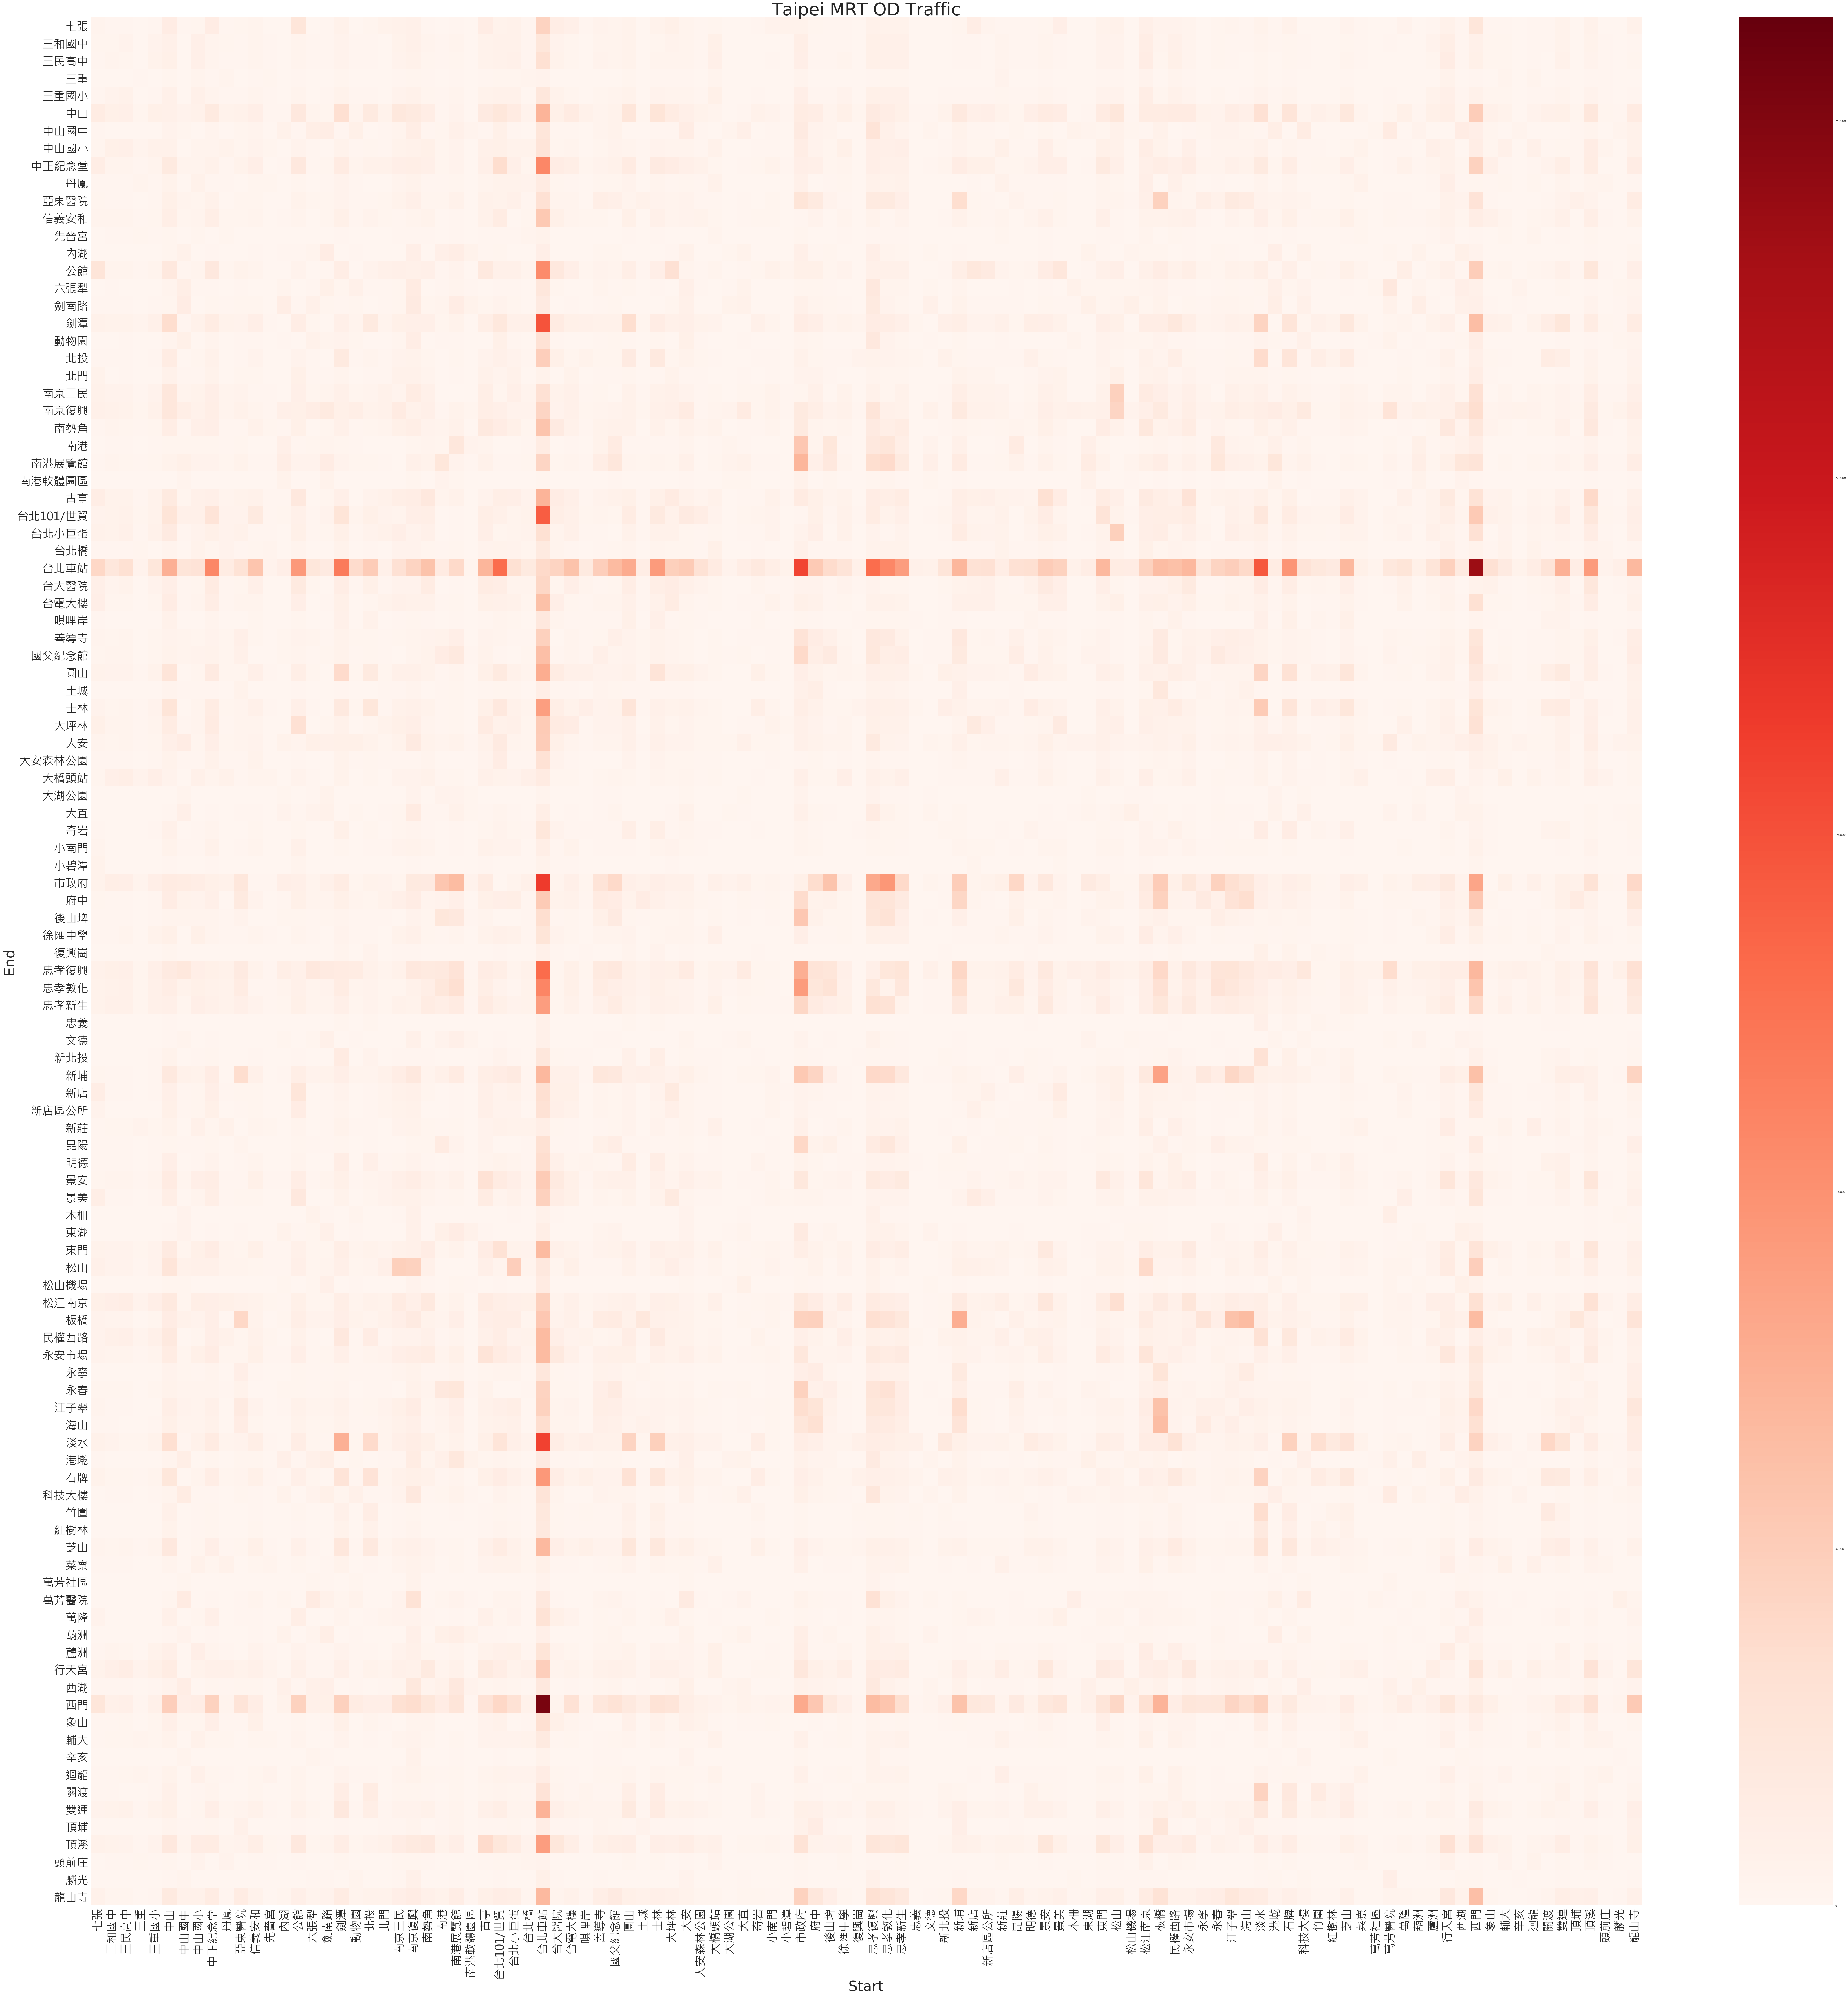

In [143]:
plt.subplots(figsize = [120, 120])
plt.tick_params(labelsize=40)
ax = sns.heatmap(df_OD_per_station_heatmap, 
           vmax = np.max(np.max(df_OD_per_station_heatmap)+10000),
           cmap = 'Reds')
ax.set_yticklabels(list(df_OD_per_station_heatmap.columns), fontproperties=myfont, rotation = 'horizontal', size = 40)
ax.set_xticklabels(list(df_OD_per_station_heatmap.columns), fontproperties=myfont, rotation = 'vertical', size = 40)
ax.set_xlabel('Start', fontsize = 50)
ax.set_ylabel('End', fontsize = 50)
plt.title('Taipei MRT OD Traffic', fontsize = 60)
plt.savefig('2017年1月台北捷運起迄流量總計.png')